### Comprehensive Report on Red Wine Quality

In [5047]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pyarrow as pa
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly

In [5048]:
# import the data
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5049]:
# check the datatype
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5050]:
# basic statistics
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Scatter Plot

In [5052]:
# selecting the variables
x = wine["citric acid"]
y = wine["pH"]

In [5053]:
def plot_random_scatter(x,y):
    """
    Creates a scatter plot of random x and y data
    """
    
    plt.figure(dpi = 144)

    # scatter plot
    sns.scatterplot(data = wine, x = "citric acid", y = "pH", hue = "quality", palette="bright", marker = 'o')

    # add a grid to the plot
    plt.grid(color = 'lightgray', linestyle = '-', zorder = 0)

    # formatting
    plt.xlabel("citric acid", fontsize = 10)
    plt.ylabel("pH", fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.title('Relationship between Citric_Acid and pH by Quality', fontsize = 13)
    plt.savefig("Scatter.png", bbox_inches = "tight", dpi = 400)
    return

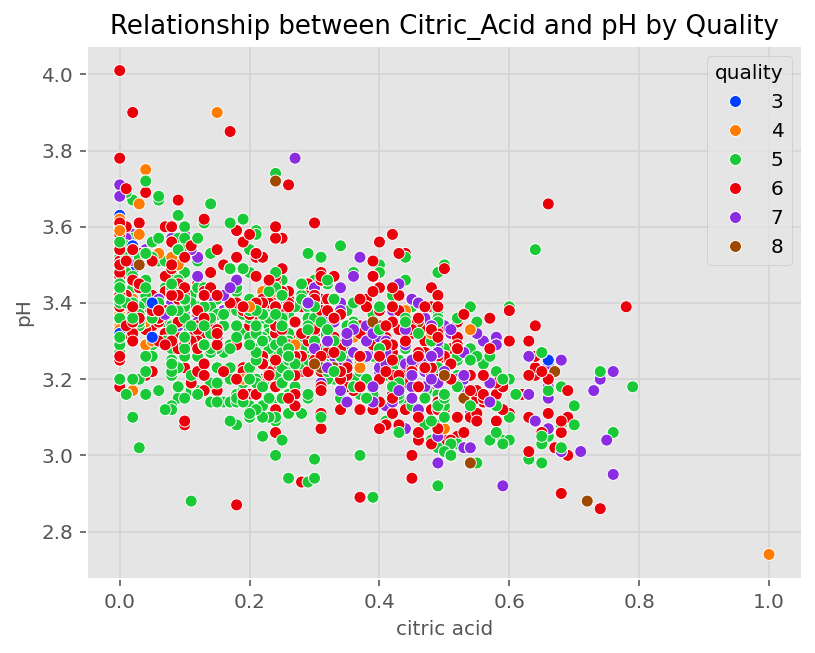

In [5054]:
plot_random_scatter(x,y)

### Heatmap

In [5056]:
# removing irrelavant columns
wine2 = wine.drop(columns=['chlorides','free sulfur dioxide','total sulfur dioxide','density','alcohol'])
wine2

,fixed acidity,volatile acidity,citric acid,residual sugar,pH,sulphates,quality
0,7.4,0.700,0.00,1.9,3.51,0.56,5
1,7.8,0.880,0.00,2.6,3.20,0.68,5
2,7.8,0.760,0.04,2.3,3.26,0.65,5
3,11.2,0.280,0.56,1.9,3.16,0.58,6
4,7.4,0.700,0.00,1.9,3.51,0.56,5
...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,3.45,0.58,5
1595,5.9,0.550,0.10,2.2,3.52,0.76,6
1596,6.3,0.510,0.13,2.3,3.42,0.75,6
1597,5.9,0.645,0.12,2.0,3.57,0.71,5


In [5057]:
def plot_heatmap(wine2):
    """
    Plots correlation between variables
    """

    ## heatmap
    plt.figure(dpi = 144)
    sns.heatmap(wine2.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'Blues')
    plt.title('Correlation of Variables')
    plt.savefig("Heatmap.png", bbox_inches = "tight", dpi = 600)
    plt.show()
    return

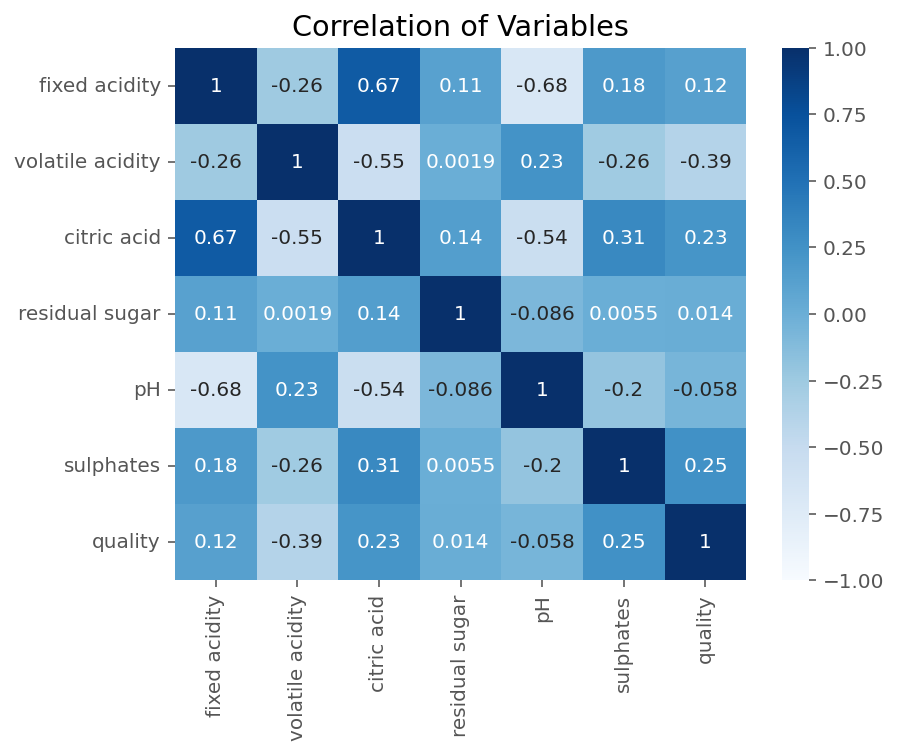

In [5058]:
plot_heatmap(wine2)

### Histogram

In [5060]:
#set the plotting style
plt.style.use("ggplot")

def plot_subplotted_histograms(free_sulfur_dioxide, pH):
    """
    Plots 2 histograms as subplots
    """

    # histplot
    fig, axs = plt.subplots(1,2, figsize = (9,3.5), dpi=144)
    sns.histplot(data = wine, x = "free sulfur dioxide", kde = True, color = "maroon", ax = axs[0],bins=15) 
    sns.histplot(data = wine, x = "pH", kde = True, color = "darkblue", ax = axs[1],bins=15)

    # formatting
    axs[0].title.set_text("Distribution of free sulfur dioxide")
    axs[0].set_ylabel("Frequency")
    axs[1].title.set_text("Distribution of pH")
    axs[1].set_ylabel("Frequency")
    plt.savefig("hist.png", bbox_inches = "tight", dpi = 600)

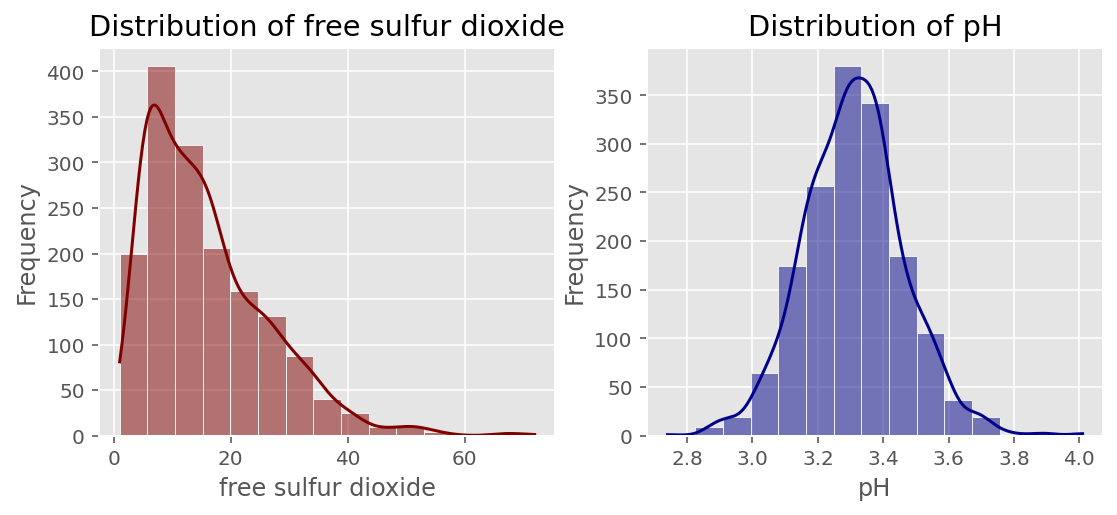

In [5061]:
plot_subplotted_histograms(wine['free sulfur dioxide'], wine['pH'])

In [5062]:
# Skewness
wine_skew_kurt_check = wine[['pH']].copy()
wine_skew_kurt_check.skew()

pH    0.193683
dtype: float64

In [5063]:
# Kurtosis
wine_skew_kurt_check.kurtosis()

pH    0.806943
dtype: float64

#### Elbow Method

In [5065]:
# select the variables
x = wine["residual sugar"]
y = wine["alcohol"]

In [5066]:
wine3 = wine[['residual sugar', 'alcohol']].copy()
scaler = MinMaxScaler()
norm = scaler.fit_transform(wine3)
inv_norm = scaler.inverse_transform(norm)

In [5067]:
def one_silhoutte_inertia(n, xy):
    """
    Calculates the silhoutte score and WCSS for n clusters
    """

    # set up the clusteres with the number of expected clusters 
    kmeans = KMeans(n_clusters = n, n_init = 20)

    # fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_

    # calculates the silhoutee score 
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_
    return score, inertia 

In [5068]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """

    fig, ax = plt.subplots(dpi = 144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker = 'o', color = 'red', facecolors = 'none', s = 50)

    #formatting
    ax.set_xlabel('Number of Clusters')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    ax.title.set_text('Elbow Method for Clusters')
    plt.savefig("elbow.png", bbox_inches = "tight", dpi = 600)
    plt.show()
    return

 2 clusters silhoutte score = 0.54
 3 clusters silhoutte score = 0.56
 4 clusters silhoutte score = 0.51
 5 clusters silhoutte score = 0.52
 6 clusters silhoutte score = 0.44
 7 clusters silhoutte score = 0.45
 8 clusters silhoutte score = 0.41
 9 clusters silhoutte score = 0.41
 10 clusters silhoutte score = 0.42
Best number of clusters =  3


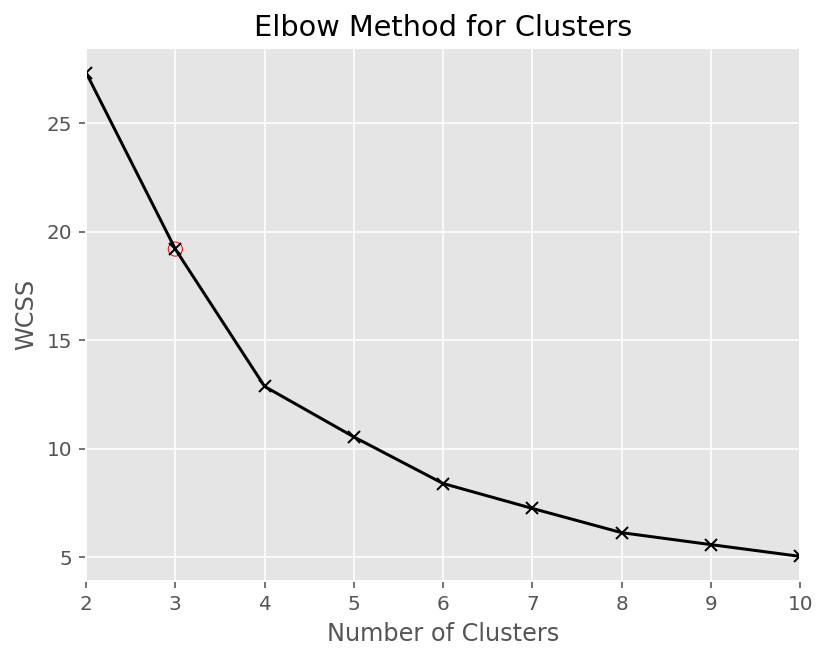

In [5069]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11): # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score 
    print(f"{n : 2g} clusters silhoutte score = {score :0.2f}")
print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)

### Scatter Plot with Clustering

In [5071]:
def plot_random_scatter(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    plots clustered data as a scatter plot with determined centre shown):
    """

    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    fig, ax = plt.subplots(dpi = 144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c = labels, marker = 'o', label = 'wine3')
    ax.scatter(xkmeans, ykmeans, c = centre_labels, cmap = "plasma", marker = 'x', s= 100, label = 'Estimated Centres')
    cbar = fig.colorbar(s, ax = ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('fixed acidity')
    ax.set_ylabel('density')

    ax.scatter(xkmeans, ykmeans,color = "red", marker = "x", label = "")
    plt.savefig("clustering.png",  bbox_inches = "tight",dpi = 600)
    return

<Figure size 640x480 with 0 Axes>

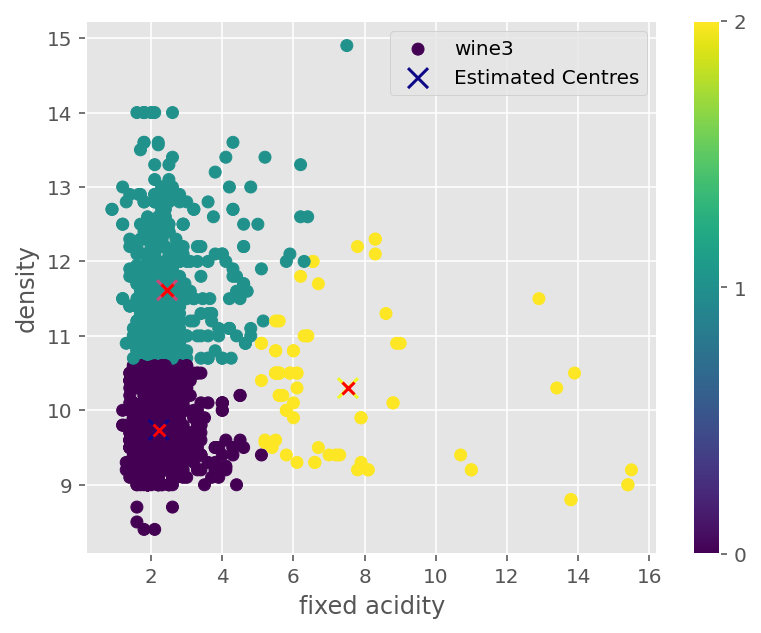

In [5072]:
for k in range(3, 4):
    kmeans = KMeans(n_clusters = k, n_init = 20)
    kmeans.fit(norm) # fit done on x,y pairs
    labels = kmeans.labels_

    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen [:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plt.savefig("clustering.png",  bbox_inches = "tight",dpi = 600)
    plot_random_scatter(labels, inv_norm, xkmeans, ykmeans, cenlabels)

### Scatter Plot with Line Fitting

In [5074]:
# fit the data instead of just the assumed model
def linfunc(x, a, b):
    """
    Function for fitting a straight line, for curve_fit
    x: independent variable
    a, b : parameters to be fitted
    """

    y = a*x + b
    return y

In [5075]:
p, cov = curve_fit(linfunc, x, y) # give it the function to be fitted then x and y 
# the errorsb are the square root of the diagonal of the covariance matrix 
sigma = np.sqrt(np.diag(cov))
print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")

a = 0.03 +/- 0.02
b = 10.34 +/- 0.05


In [5076]:
p_np = Poly.fit(x, y, 1) # Polynomial just needs x, y data and the number of degrees
cov = np.polyfit(x, y, 1, cov=True)[1] # need a separate call as numpy devs have still not merged
sigma_np = np.sqrt(np.diag(cov))
b, a = p_np.convert().coef # note the opposite order of coefficients
print(f"a = {a:.2f} +/- {sigma_np[0]:.2f}")
print(f"b = {b:.2f} +/- {sigma_np[1]:.2f}")

a = 0.03 +/- 0.02
b = 10.34 +/- 0.05


In [5077]:
# line data
xline = np.linspace(0, 1, 10)
yline = xline

In [5078]:
# select the variable
x = wine["alcohol"]
y = wine["density"]

In [5079]:
def plot_random_scatter_with_line(x, y):
    """
    Creates a scatter plot of random x and y data with overplotted line
    """

    # perform linear regression to fit a line
    coefficients = np.polyfit(x, y, 1) # linear fit (degree 1)
    yline = np.polyval(coefficients, x)

    # scatter plot and fitted line
    plt.figure(dpi=144)
    plt.scatter(x, y, label = 'Data Points', color = 'blue')
    plt.plot(x, yline, label = f'Fitted Line (y = {coefficients[0]:.2f}x + {coefficients[1]:.2f})', color = 'red')
    
    # formatting
    plt.xlabel('Alcohol')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Scatter Plot of Alcohol and Density with Line Fitting')
    plt.savefig("scatterfit.png", dpi = 600)
    plt.show()
    return

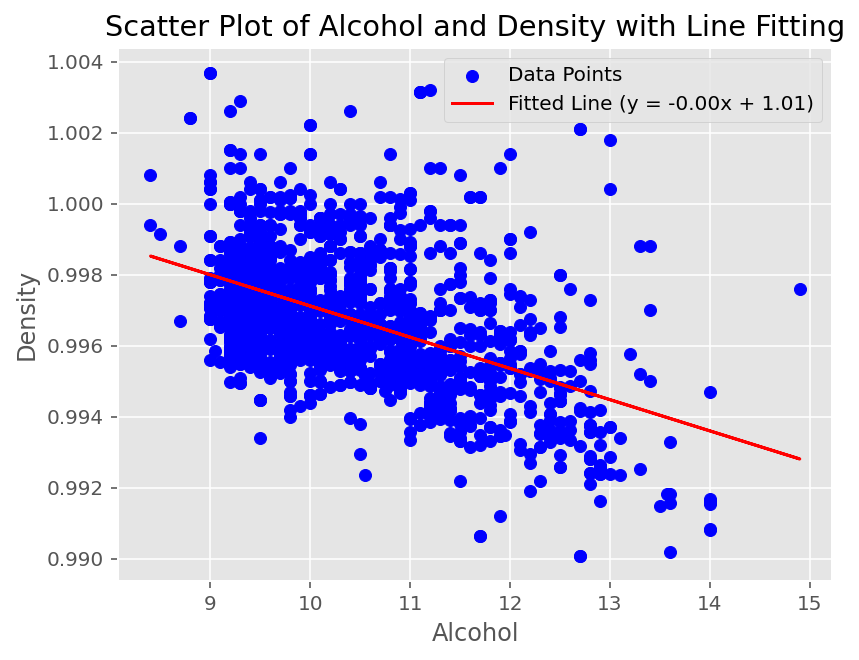

In [5080]:
plot_random_scatter_with_line(x, y)